# Loading Dataset

In [1]:
import pandas as pd

data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [2]:
data.head(100)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,58,1,4,130,263,0,0,140,1,2.0,2,1
96,43,1,2,142,207,0,0,138,0,0.0,1,0
97,39,1,3,160,147,1,0,160,0,0.0,1,0
98,56,1,4,120,85,0,0,140,0,0.0,1,0


# Data Visualization

<Axes: title={'center': 'Age Distribution'}, xlabel='age', ylabel='Count'>

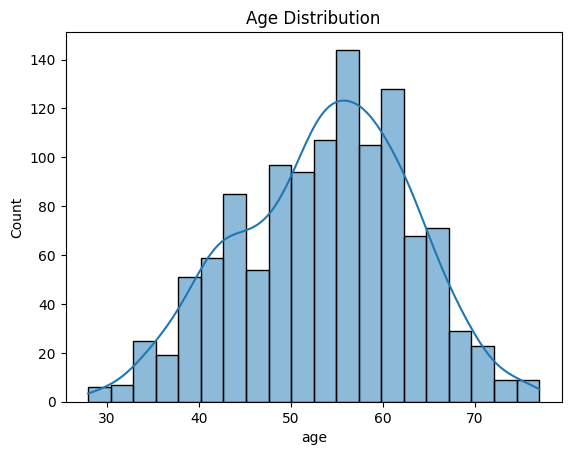

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Age Distribution')
sns.histplot(data=data['age'],kde=True)

<Axes: xlabel='max heart rate', ylabel='cholesterol'>

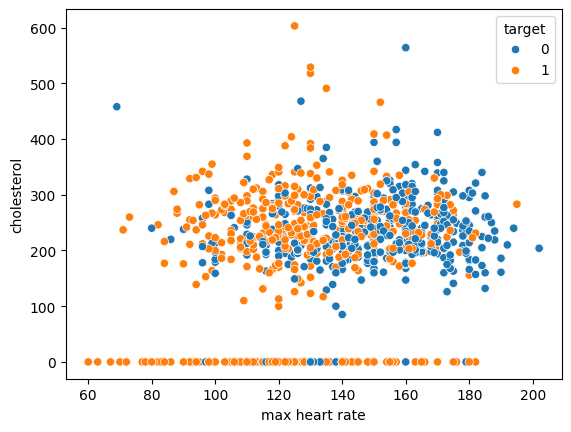

In [4]:
sns.scatterplot(data=data, x='max heart rate',y='cholesterol',hue='target')

<Axes: ylabel='age'>

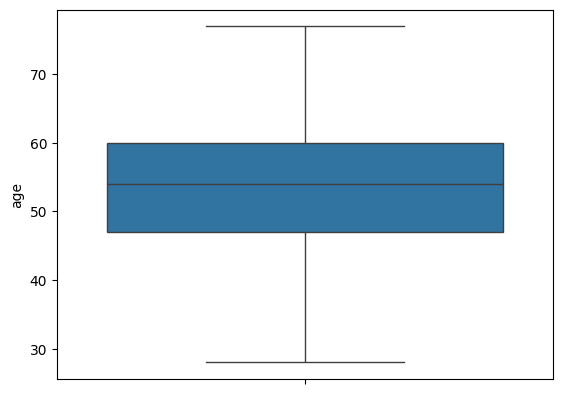

In [5]:
sns.boxplot(data=data['age'])

<Axes: ylabel='cholesterol'>

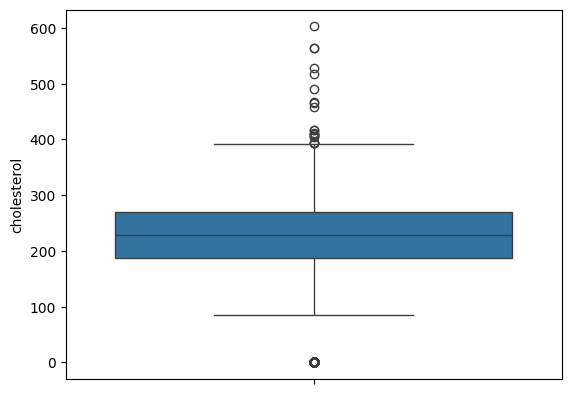

In [6]:
sns.boxplot(data=data['cholesterol'])

<Axes: ylabel='max heart rate'>

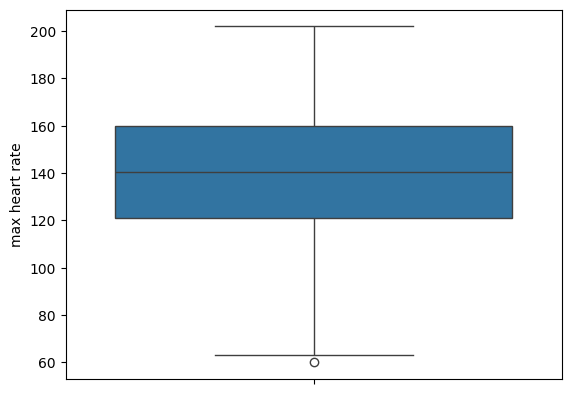

In [7]:
sns.boxplot(data=data['max heart rate'])

<Axes: ylabel='resting bp s'>

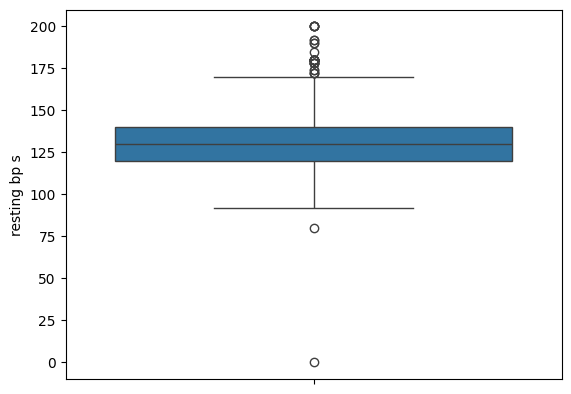

In [8]:
sns.boxplot(data=data['resting bp s'])

<Axes: xlabel='cholesterol', ylabel='max heart rate'>

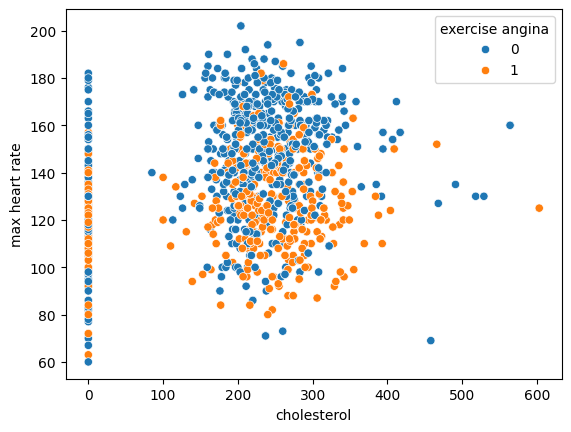

In [9]:
sns.scatterplot(data=data,x='cholesterol',y='max heart rate',hue='exercise angina')

<Axes: xlabel='cholesterol', ylabel='max heart rate'>

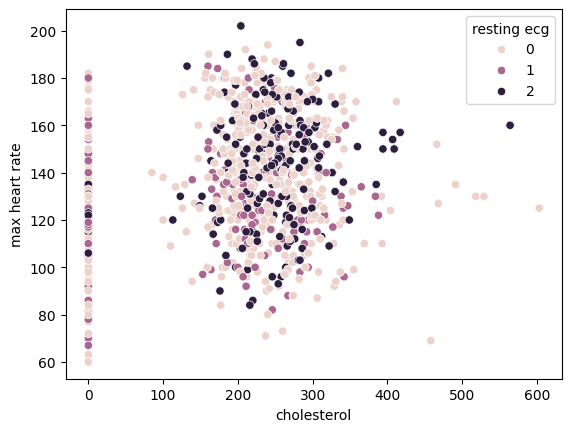

In [10]:
sns.scatterplot(data=data,x='cholesterol',y='max heart rate',hue='resting ecg')

<Axes: xlabel='cholesterol', ylabel='max heart rate'>

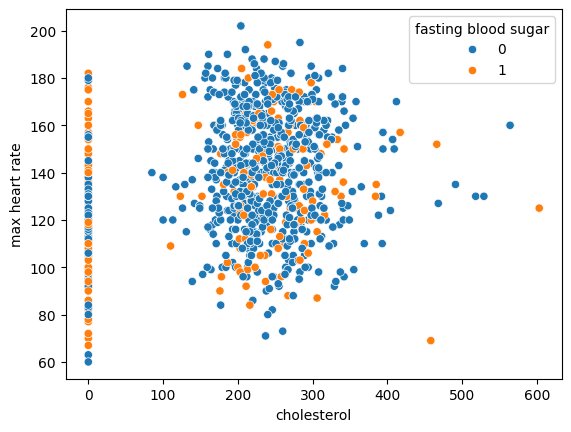

In [11]:
sns.scatterplot(data=data,x='cholesterol',y='max heart rate',hue='fasting blood sugar')

<Axes: xlabel='cholesterol', ylabel='max heart rate'>

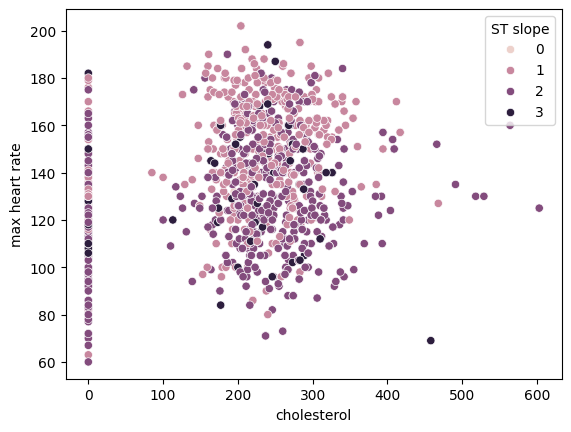

In [12]:
sns.scatterplot(data=data,x='cholesterol',y='max heart rate',hue='ST slope')

<Axes: >

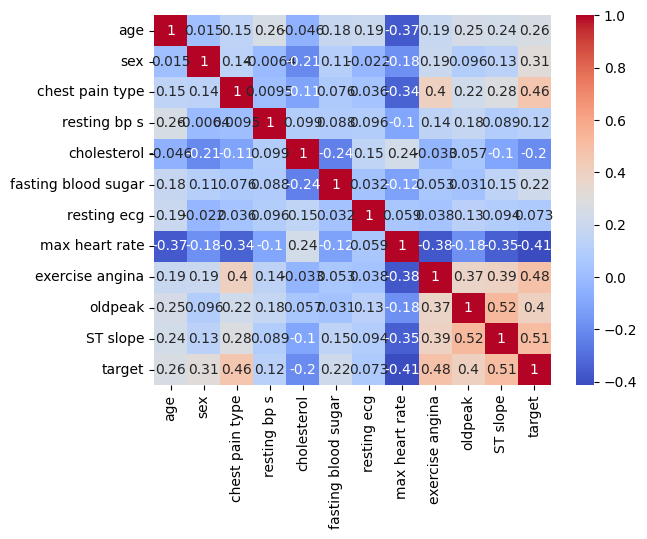

In [13]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

# Preprocessing

Check for missing value

In [14]:
data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

Feature Selection

In [15]:
from scipy.stats import pearsonr
copydata = data.drop(columns='target')
features = list(copydata.columns)

In [16]:
features

['age',
 'sex',
 'chest pain type',
 'resting bp s',
 'cholesterol',
 'fasting blood sugar',
 'resting ecg',
 'max heart rate',
 'exercise angina',
 'oldpeak',
 'ST slope']

In [17]:
coefficient_list = []
p_values = []

for feature in features:
    correlation_coefficient,p_value = pearsonr(copydata[feature],data['target'])
    coefficient_list.append(correlation_coefficient)
    p_values.append(p_value)

filtered_features = []

for correlation_coefficient,p_value,feature in zip(coefficient_list,p_values,features):
    if correlation_coefficient > 0.05 and p_value < 0.05:
        filtered_features.append(feature)

In [18]:
filtered_features

['age',
 'sex',
 'chest pain type',
 'resting bp s',
 'fasting blood sugar',
 'resting ecg',
 'exercise angina',
 'oldpeak',
 'ST slope']

In [19]:
columns = filtered_features
columns.append('target')

In [20]:
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv',usecols=columns)

In [21]:
data.head()

,age,sex,chest pain type,resting bp s,fasting blood sugar,resting ecg,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,0,0,0,0.0,1,0
1,49,0,3,160,0,0,0,1.0,2,1
2,37,1,2,130,0,1,0,0.0,1,0
3,48,0,4,138,0,0,1,1.5,2,1
4,54,1,3,150,0,0,0,0.0,1,0


Removing Outlier resting bp s

Before removing

In [22]:
data.shape

(1190, 10)

In [23]:
import numpy as np
Q1 = data['resting bp s'].quantile(0.25)
Q3 = data['resting bp s'].quantile(0.75)

IQR = Q3 - Q1
Lower = Q1 - 1.5*IQR
Upper = Q3 + 1.5*IQR

Lower_array = np.where(data['resting bp s']<=Lower)[0]
Upper_array = np.where(data['resting bp s']>=Upper)[0]

data.drop(index=Lower_array,inplace=True)
data.drop(index=Upper_array,inplace=True)

data = data.reset_index(drop=True)

In [24]:
data.shape

(1137, 10)

Standardize

In [25]:
from sklearn.preprocessing import StandardScaler

df = data.copy()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

df = pd.DataFrame(scaled_data,columns=columns)


In [26]:
data['age'] = df['age']
data['resting bp s'] = df['resting bp s']

In [27]:
data.head()

,age,sex,chest pain type,resting bp s,fasting blood sugar,resting ecg,exercise angina,oldpeak,ST slope,target
0,-1.440362,1,2,0.645446,0,0,0,0.0,1,0
1,-0.482959,0,3,1.965361,0,0,0,1.0,2,1
2,-1.759497,1,2,-0.014511,0,1,0,0.0,1,0
3,-0.589337,0,4,0.513455,0,0,1,1.5,2,1
4,0.048932,1,3,1.305404,0,0,0,0.0,1,0


In [28]:
from sklearn.model_selection import train_test_split

x = data.drop(columns=['target'])
y = data['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# Modeling

Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(x_train,y_train)

LR_pred = LR.predict(x_test)


Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

NB.fit(x_train,y_train)

NB_pred = NB.predict(x_test)


# Evaluation

In [31]:
from sklearn.metrics import classification_report

print("LogisticRegression")
print(classification_report(y_test,LR_pred))

LogisticRegression
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       146
           1       0.81      0.84      0.83       196

    accuracy                           0.80       342
   macro avg       0.79      0.79      0.79       342
weighted avg       0.80      0.80      0.80       342



In [32]:
from sklearn.metrics import classification_report

print("Naive Bayes")
print(classification_report(y_test,NB_pred))

Naive Bayes
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       146
           1       0.82      0.84      0.83       196

    accuracy                           0.80       342
   macro avg       0.80      0.79      0.80       342
weighted avg       0.80      0.80      0.80       342



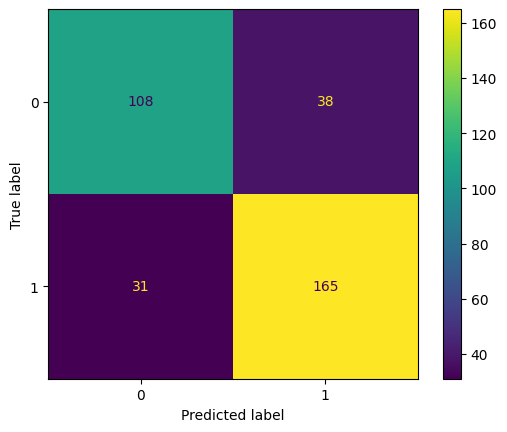

In [34]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,LR_pred),display_labels=LR.classes_)
display.plot()

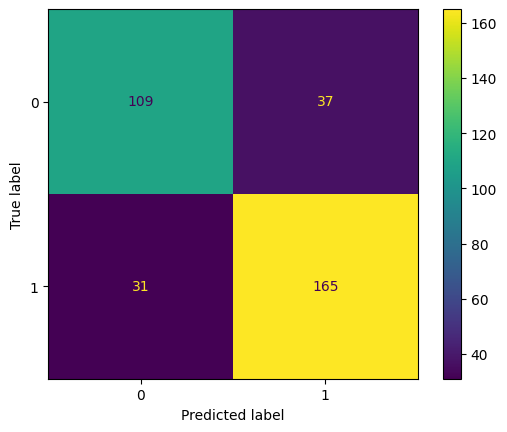

In [35]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,NB_pred),display_labels=NB.classes_)
display.plot()